### This file plots the processed csv files with matplotlib

Note: manually select date and file name in the corresponding section (either cpu, netsend or netrecv)

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pandas as pd

## Adjust date of processed csv files

In [2]:
date = '2018-12-07_09h02'
base_path = '/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/' + date + '/'
worker_list = [8,16,32,64]

In [3]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return str(val).rstrip('0') + ' M'
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return str(val).rstrip('0') + ' k'
    else:
        return tick_val

## CPU utilization plot

In [35]:
# read data into pandas dataframe
file_name = 'dstat_server_cpu_ratio_1:0.csv'
df_c = pd.read_csv(base_path + file_name)
df_c

,client,worker,cpu_mean,cpu_std
0,6,8,12.619251,0.257586
1,6,16,12.726115,0.660184
2,6,32,13.602923,0.165533
3,6,64,17.030945,0.396847
4,24,8,42.297880,1.357398
5,24,16,44.278268,0.801146
6,24,32,43.796809,0.335472
7,24,64,46.928732,0.415948
8,48,8,44.967891,0.293601
9,48,16,62.789907,0.511785


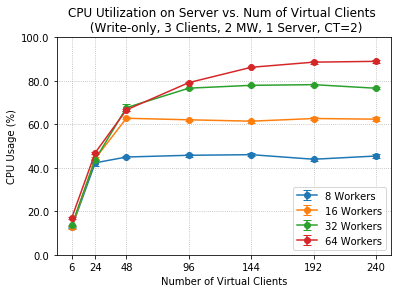

In [37]:
f = plt.figure()
plt.title("CPU Utilization on Server vs. Num of Virtual Clients \n (Write-only, 3 Clients, 2 MW, 1 Server, CT=2)")

for worker in worker_list:
    # extract values of interest
    df_c_cut = df_c[(df_c.worker == worker)]
    
    vcs = df_c_cut['client']
    tps = df_c_cut['cpu_mean']
    std = df_c_cut['cpu_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("CPU Usage (%)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=100)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/"+date+"/"+file_name[:-4]+".png", dpi = 150)

## Network send activity plot

In [4]:
# read data into pandas dataframe
file_name = 'dstat_mw_netsend_ratio_1:0.csv'
df_c = pd.read_csv(base_path + file_name)
df_c

,client,worker,netsend_mean,netsend_std
0,6,8,7.044579e+06,58544.880327
1,6,16,7.019947e+06,120421.371083
2,6,32,7.027521e+06,53460.496374
3,6,64,7.175395e+06,99243.762884
4,24,8,1.879273e+07,298314.104378
5,24,16,1.979712e+07,115647.561308
6,24,32,1.940003e+07,220310.658777
7,24,64,1.931252e+07,167007.300792
8,48,8,2.144443e+07,10545.752223
9,48,16,2.277408e+07,244077.707435


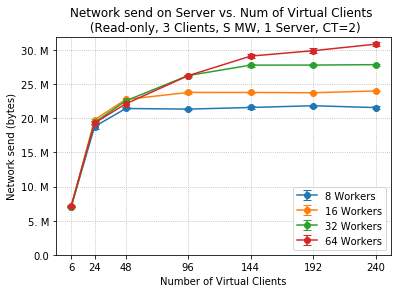

In [5]:
f = plt.figure()
plt.title("Network send on Server vs. Num of Virtual Clients \n (Read-only, 3 Clients, S MW, 1 Server, CT=2)")

for worker in worker_list:
    # extract values of interest
    df_c_cut = df_c[(df_c.worker == worker)]
    
    vcs = df_c_cut['client']
    tps = df_c_cut['netsend_mean']
    std = df_c_cut['netsend_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Network send (bytes)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=1e6+np.max(df_c['netsend_mean']))
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/"+date+"/"+file_name[:-4]+".png", dpi = 150)

## Network recv activity plot

In [17]:
# read data into pandas dataframe
file_name = 'dstat_mw_netrecv_ratio_0:1.csv'
df_c = pd.read_csv(base_path + file_name)
df_c

,client,worker,netrecv_mean,netrecv_std
0,6,8,6.710415e+06,17860.885650
1,6,16,6.731611e+06,35032.757458
2,6,32,6.711637e+06,3191.288038
3,6,64,6.734419e+06,30676.714529
4,24,8,6.616472e+06,17726.739158
5,24,16,6.489387e+06,79511.583630
6,24,32,6.496063e+06,29890.922827
7,24,64,6.536514e+06,22076.120689
8,48,8,6.544806e+06,39587.522113
9,48,16,6.499153e+06,16132.949643


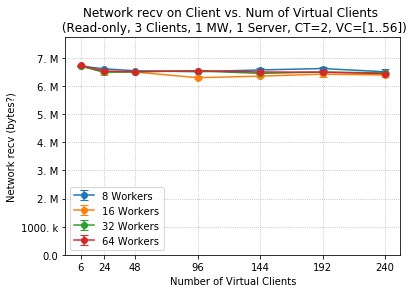

In [18]:
f = plt.figure()
plt.title("Network recv on Client vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..56])")

for worker in worker_list:
    # extract values of interest
    df_c_cut = df_c[(df_c.worker == worker)]
    
    vcs = df_c_cut['client']
    tps = df_c_cut['netrecv_mean']
    std = df_c_cut['netrecv_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Network recv (bytes?)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=1e6+np.max(df_c['netrecv_mean']))
plt.legend()


ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/"+date+"/"+file_name[:-4]+".png", dpi = 150)